# PubMed Papers: Bag of Words Frequency Models
### Regression Analysis 
#### *Attempt to model the relationship between the words in the corpus with the target variable: citations.*

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#nlp
import nltk
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import re

#modeling
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR

import warnings
warnings.filterwarnings('ignore')

In [17]:
filename = '../data/pubmed_nltk_stemmed_preproc.csv'

### NLP Modeling

In [23]:
df = pd.read_csv(filename).set_index('pmid')

In [24]:
df.head()

,date,citations,len_text,len_title,days_live,fulltext
pmid,,,,,,
22627698,2012-07-01,35,1780,165,3233,"['extract', 'biolog', 'inform', 'comput', 'ana..."
22952238,2012-09-01,4,793,81,3171,"['uncov', 'transcript', 'factor', 'modul', 'us..."
22944687,2012-09-01,19,1698,64,3171,"['understand', 'substrat', 'specif', 'convent'..."
22075226,2012-09-01,12,1024,42,3171,"['membran', 'protein', 'structur', 'bioinforma..."
23012584,2012-09-01,10,935,60,3171,"['futur', 'medic', 'diagnostics:', 'larg', 'di..."


In [26]:
X = df['fulltext']
y = df['citations']

In [27]:
cvec = CountVectorizer(ngram_range=(1,2), max_features=10_000)


In [28]:
# convert training data to dataframe
X_cvec = pd.DataFrame(cvec.fit_transform(X).todense(),
                         columns=cvec.get_feature_names())

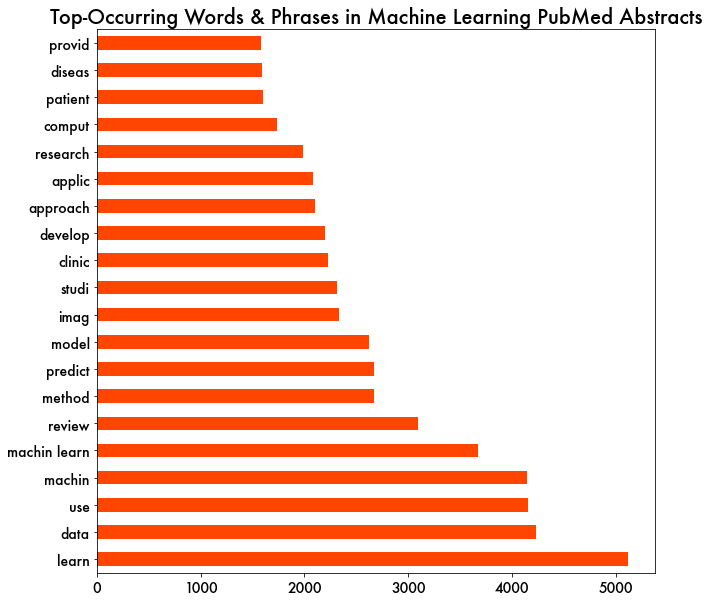

In [29]:
# plot top occurring words/phrases
plt.figure(figsize = (10,10))
X_cvec.sum().sort_values(ascending = False).head(20).plot(kind='barh', color='orangered');
figurefont = {'fontname' : 'Futura'}
plt.xticks(**figurefont, fontsize = 14);
plt.yticks(**figurefont, fontsize = 14);
plt.title('Top-Occurring Words & Phrases in Machine Learning PubMed Abstracts',**figurefont, fontsize = 20);
plt.savefig('../figures/pubmed_top_occurring_stemmed.jpg',  bbox_inches = "tight")

### Frequency Model

#### with Count Vectorization

In [34]:
cvec = CountVectorizer(min_df=5, max_df=.98, ngram_range=(1,2))

In [35]:
X_train_cvec = cvec.fit_transform(X_train)
X_test_cvec = cvec.transform(X_test)

In [36]:
model_list = [
    LinearRegression(),
    DecisionTreeRegressor(),
    BaggingRegressor(),
    RandomForestRegressor(),
    AdaBoostRegressor(),
]

results_list = []

for model_obj in model_list:
    #instantiate each model 
    model = model_obj
   
    #fit the model
    model.fit(X_train_cvec, y_train) 
  
    #create a dictionary with scores and evaluation metrics for each model
    results_dict = {}    
    results_dict['model_name'] = str(model_obj)
    results_dict['train_score'] = model.score(X_train_cvec, y_train)
    results_dict['test_score'] = model.score(X_test_cvec, y_test)
    results_dict['cv_score'] = cross_val_score(model, X_train_cvec, y_train, cv = 5).mean()
    results_dict['train_RMSE'] = np.sqrt(mean_squared_error(y_train, model.predict(X_train_cvec)))
    results_dict['test_RMSE'] = np.sqrt(mean_squared_error(y_test, model.predict(X_test_cvec))) 
    
    #add the dictionary to the list
    results_list.append(results_dict)

In [37]:
results = pd.DataFrame(results_list)
results

,model_name,train_score,test_score,cv_score,train_RMSE,test_RMSE
0,LinearRegression(),1.000000,-0.788389,-0.591634,0.000022,19.044473
1,DecisionTreeRegressor(),1.000000,-0.917163,-1.030818,0.000000,19.718211
2,BaggingRegressor(),0.805466,-0.224587,-0.200192,6.243488,15.759152
3,RandomForestRegressor(),0.853338,-0.080345,-0.089244,5.421115,14.801961
4,AdaBoostRegressor(),-1.403641,-1.448894,-2.039519,21.946458,22.285533


#### with TfidfVectorization

In [38]:
tvec = TfidfVectorizer(min_df=5, max_df=.98, ngram_range=(1,2))

In [39]:
X_train_tvec = tvec.fit_transform(X_train)
X_test_tvec = tvec.transform(X_test)

In [40]:
model_list = [
    LinearRegression(),
    DecisionTreeRegressor(),
    BaggingRegressor(),
    RandomForestRegressor(),
    AdaBoostRegressor(),
    SVR()
]

results_list = []

for model_obj in model_list:
    #instantiate each model 
    model = model_obj
   
    #fit the model
    model.fit(X_train_tvec, y_train) 
  
    #create a dictionary with scores and evaluation metrics for each model
    results_dict = {}    
    results_dict['model_name'] = str(model_obj)
    results_dict['train_score'] = model.score(X_train_tvec, y_train)
    results_dict['test_score'] = model.score(X_test_tvec, y_test)
    results_dict['cv_score'] = cross_val_score(model, X_train_tvec, y_train, cv = 5).mean()
    results_dict['train_RMSE'] = np.sqrt(mean_squared_error(y_train, model.predict(X_train_tvec)))
    results_dict['test_RMSE'] = np.sqrt(mean_squared_error(y_test, model.predict(X_test_tvec))) 
    
    #add the dictionary to the list
    results_list.append(results_dict)

In [41]:
results = pd.DataFrame(results_list)
results

,model_name,train_score,test_score,cv_score,train_RMSE,test_RMSE
0,LinearRegression(),1.000000,-0.440166,-0.279784,0.000005,17.090089
1,DecisionTreeRegressor(),1.000000,-0.701266,-1.048059,0.000000,18.574798
2,BaggingRegressor(),0.796298,-0.147523,-0.136018,6.388925,15.255226
3,RandomForestRegressor(),0.858955,-0.060179,-0.027909,5.316296,14.663161
4,AdaBoostRegressor(),-2.406761,-2.382546,-1.813329,26.127656,26.191470
5,SVR(),-0.057124,-0.141823,-0.118579,14.554342,15.217292


### Sentiment Analysis

In [42]:
# Instantiate Sentiment Intensity Analyzer
sentiment = SentimentIntensityAnalyzer()

NameError: name 'SentimentIntensityAnalyzer' is not defined

In [ ]:
#test
sentiment.polarity_scores(df['text'][8648])

In [ ]:
polarity_list = []
for x in df['text']:
    dict_keys =  sentiment.polarity_scores(x).keys()
    dict_values = sentiment.polarity_scores(x).values()
    polarity_dict = dict(zip(dict_keys,dict_values))
    polarity_list.append(polarity_dict)

In [ ]:
polarity_df = pd.DataFrame(polarity_list)

In [ ]:
polarity_df.value_counts()

In [ ]:
# Add the target variable to the sentiment polarity df
polarity_df['claps'] = df['claps']

In [ ]:
polarity_df

In [ ]:
X = polarity_df.drop(columns = 'claps')
y = polarity_df['claps']

In [ ]:
#train-test split
X_train, X_test, y_train, y_test=train_test_split(X,
                                                 y,
                                                 test_size=.2,
                                                 random_state=42)

In [ ]:
model_list = [
    LinearRegression(),
    DecisionTreeRegressor(),
    BaggingRegressor(),
    RandomForestRegressor(),
    AdaBoostRegressor(),
    SVR()
]

results_list = []

for model_obj in model_list:
    #instantiate each model 
    model = model_obj
   
    #fit the model
    model.fit(X_train, y_train) 
  
    #create a dictionary with scores and evaluation metrics for each model
    results_dict = {}    
    results_dict['model_name'] = str(model_obj)
    results_dict['train_score'] = model.score(X_train, y_train)
    results_dict['test_score'] = model.score(X_test, y_test)
    results_dict['cv_score'] = cross_val_score(model, X_train, y_train, cv = 5).mean()
    results_dict['train_RMSE'] = np.sqrt(mean_squared_error(y_train, model.predict(X_train)))
    results_dict['test_RMSE'] = np.sqrt(mean_squared_error(y_test, model.predict(X_test)))
    
    #add the dictionary to the list
    results_list.append(results_dict)

In [ ]:
results = pd.DataFrame(results_list)
results